In [15]:
import utils
import importlib
import pandas as pd

importlib.reload(utils)

models = {
    'kimi': 'moonshotai/kimi-k2:free',
    'qwen-8b': 'qwen/qwen3-8b:free',
    'deepseek-qwen': ' deepseek/deepseek-r1-0528-qwen3-8b:free',
    'deepseek': 'deepseek/deepseek-r1-0528:free',
}

In [16]:
df = pd.read_csv('data/train.csv')
df

,task,answer
0,The value of $y$ varies inversely as $\sqrt x$...,[600]
1,In how many ways can 4 distinct beads be place...,[12]
2,In how many ways can seven beads of distinct c...,[420]
3,"Find the number of ordered quadruples $(a,b,c,...",[8]
4,Точки \(A\) и \(C\) разбивают окружность н...,[100.0]
...,...,...
995,How many zeros are at the end of (100!)(200!)(...,[147]
996,What is the sum of the squares of all real val...,[20]
997,"The average (mean) of 20 numbers is 30, and th...",[24]
998,57+70=,[127]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from tqdm import tqdm

def evaluate(prompts, answers, models):

    results = {
        'model': [],
        'accuracy': [],
        'total': len(prompts),
        'correct': [],
        'predictions': {}
    }
    
    # true_answers = []
    # for ans in answers:
    #     if isinstance(ans, str):
    #         if '/' in ans:
    #             num, denom = map(float, ans.split('/'))
    #             true_answers.append(num / denom)
    #         else:
    #             true_answers.append(float(ans))
    #     else:
    #         true_answers.append(float(ans))
    
    #for model_name, model_code in tqdm(models.items(), desc="Evaluating models"):
    for model_name, model_code in models.items():
        model_predictions = []
        model_correct = 0
        
        for prompt in tqdm(prompts, desc=f"Processing {model_name}", leave=False):
            raw_answer = utils.get_answer_from_api(model_name=model_code, content=prompt)
            prediction = utils.extract_answer(raw_answer)
            
            try: 
            #вроде все ответы от модельки нормальные, но лучше перебдеть
                if isinstance(prediction, str):
                    if '/' in prediction:
                        num, denom = map(float, prediction.split('/'))
                        pred_float = num / denom
                    else:
                        pred_float = float(prediction)
                else:
                    pred_float = prediction
            except Exception as e:
                print(e)
                pred_float = float('nan')
            
            model_predictions.append(pred_float)
        print(model_predictions)
        for i, pred in enumerate(model_predictions):
            if not np.isnan(pred) and abs(pred - answers[i]) < 1e-5:
                model_correct += 1
        
        accuracy = model_correct / len(prompts)
        results['model'].append(model_name)
        results['accuracy'].append(accuracy)
        results['correct'].append(model_correct)
        results['predictions'][model_name] = model_predictions
    
    return results

def visualize_results(results):
    df = pd.DataFrame({
        'Model': results['model'],
        'Accuracy': results['accuracy'],
        'Correct': results['correct'],
        'Total': results['total']
    })
    
    df = df.sort_values('Accuracy', ascending=False)
    

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
    plt.title('Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Model')
    
    for i, v in enumerate(df['Accuracy']):
        ax.text(v + 0.01, i, f"{v:.4f}", color='black', va='center')

    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='Correct', y='Model', data=df, palette='rocket')
    plt.title('Correct Answers Count')
    plt.xlabel('Correct Answers')
    plt.ylabel('')
    plt.tight_layout()
    
    for i, v in enumerate(df['Correct']):
        ax.text(v + 0.5, i, f"{v}/{results['total']}", color='black', va='center')
    
    plt.show()
    
    return df

prompts = df['task'][:2]
answers = df['answer'][:2]
answers = [Fraction(i.replace('[', '').replace(']', '')) for i in answers]
print(answers)
results = evaluate(prompts, answers, models)

df_results = visualize_results(results)
print(df_results)

[Fraction(600, 1), Fraction(12, 1)]


[600.0, 11.0]


Критическая ошибка: APITimeoutError - Request timed out.


ValueError: could not convert string to float: 'ERROR: APITimeoutError'

локально

0        [600]
1         [12]
2        [420]
3          [8]
4      [100.0]
        ...   
995      [147]
996       [20]
997       [24]
998      [127]
999        [4]
Name: answer, Length: 1000, dtype: object


[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,

[-8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.

[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.

[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.

C:\Users\Pavel\AppData\Local\Temp\ipykernel_24648\613125125.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
C:\Users\Pavel\AppData\Local\Temp\ipykernel_24648\613125125.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Correct', y='Model', data=df, palette='rocket')


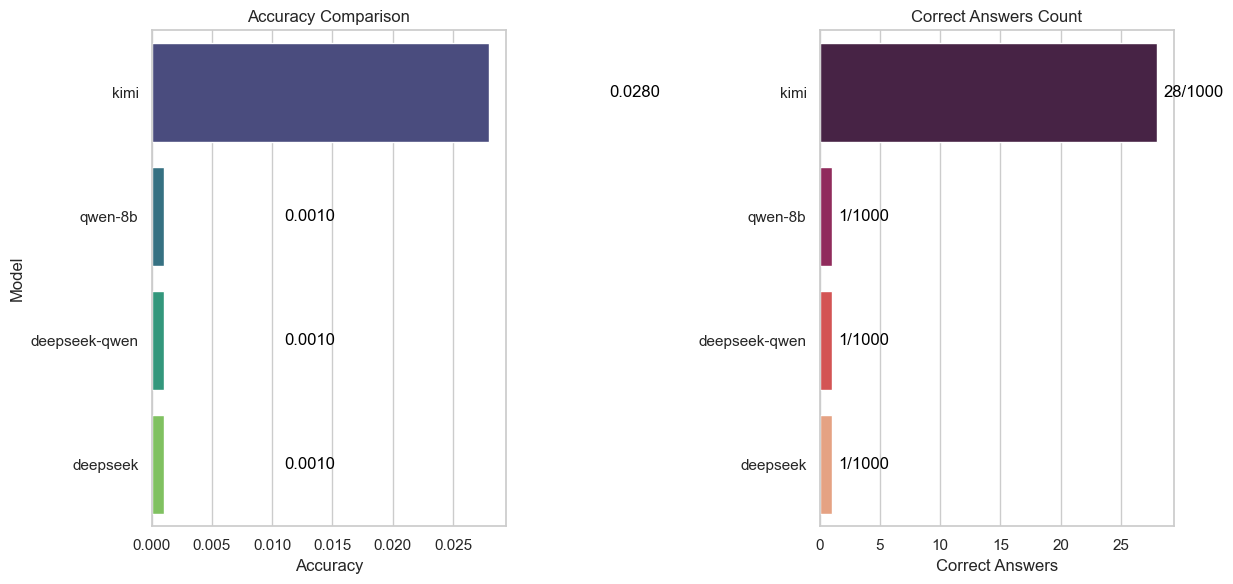

           Model  Accuracy  Correct  Total
0           kimi     0.028       28   1000
1        qwen-8b     0.001        1   1000
2  deepseek-qwen     0.001        1   1000
3       deepseek     0.001        1   1000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import utils
models = {
    'kimi': "moonshotai/kimi-k2",
    'qwen-8b': "Qwen/Qwen1.5-8B",
    'deepseek-qwen': "deepseek-ai/deepseek-math-7b-base",
    'deepseek': "deepseek-ai/deepseek-math-7b-base",
}

def evaluate(prompts, answers, models):

    results = {
        'model': [],
        'accuracy': [],
        'total': len(prompts),
        'correct': [],
        'predictions': {}
    }
    
    # true_answers = []
    # for ans in answers:
    #     if isinstance(ans, str):
    #         if '/' in ans:
    #             num, denom = map(float, ans.split('/'))
    #             true_answers.append(num / denom)
    #         else:
    #             true_answers.append(float(ans))
    #     else:
    #         true_answers.append(float(ans))
    
    #for model_name, model_code in tqdm(models.items(), desc="Evaluating models"):
    for model_name, model_code in models.items():
        model_predictions = []
        model_correct = 0
        
        for prompt in tqdm(prompts, desc=f"Processing {model_name}", leave=False):
            raw_answer = utils.get_local_answer(model_name=model_code, content=prompt)
            prediction = utils.extract_answer(raw_answer)
            
            try: 
            #вроде все ответы от модельки нормальные, но лучше перебдеть
                if isinstance(prediction, str):
                    if '/' in prediction:
                        num, denom = map(float, prediction.split('/'))
                        pred_float = num / denom
                    else:
                        pred_float = float(prediction)
                else:
                    pred_float = prediction
            except Exception as e:
                print(e)
                pred_float = float('nan')
            
            model_predictions.append(pred_float)
        print(model_predictions)
        for i, pred in enumerate(model_predictions):
            if not np.isnan(pred) and abs(pred - answers[i]) < 1e-5:
                model_correct += 1
        
        accuracy = model_correct / len(prompts)
        results['model'].append(model_name)
        results['accuracy'].append(accuracy)
        results['correct'].append(model_correct)
        results['predictions'][model_name] = model_predictions
    
    return results

def visualize_results(results):
    df = pd.DataFrame({
        'Model': results['model'],
        'Accuracy': results['accuracy'],
        'Correct': results['correct'],
        'Total': results['total']
    })
    
    df = df.sort_values('Accuracy', ascending=False)
    

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
    plt.title('Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Model')
    
    for i, v in enumerate(df['Accuracy']):
        ax.text(v + 0.01, i, f"{v:.4f}", color='black', va='center')

    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='Correct', y='Model', data=df, palette='rocket')
    plt.title('Correct Answers Count')
    plt.xlabel('Correct Answers')
    plt.ylabel('')
    plt.tight_layout()
    
    for i, v in enumerate(df['Correct']):
        ax.text(v + 0.5, i, f"{v}/{results['total']}", color='black', va='center')
    
    plt.show()
    
    return df

prompts = df['task']
answers = df['answer']
print(answers)
answers = [Fraction(i.replace('[', '').replace(']', '')) for i in answers]
results = evaluate(prompts, answers, models)

df_results = visualize_results(results)
print(df_results)

In [18]:
utils.get_local_answer(model_name='deepseek', content='Сколько будет 2+2?')

TypeError: get_local_answer() got an unexpected keyword argument 'model_name'